In [1]:
import pickle
import argparse
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

from main import main

In [33]:
# Loading metrics from saved pickles
metrics = {}
for m in glob.glob("runs/*/*/metrics.pkl"):
    run = m.split('/')[1]
    if run not in metrics:
        metrics[run] = {}
    seed = m.split('/')[2]
    metrics[run][seed] = pickle.load(open(m, 'rb'))

## Run Iterated Learning Base Experiments

In [2]:
#LSTM
seeds = [41, 42, 43, 44, 45]

metrics_lstm = {}
for s in seeds:
    metrics_lstm[s] = main(['--seed', str(s), '--iterations', '1000'])

metrics_gru = {}
for s in seeds:
    metrics_gru[s] = main(['--seed', str(s), '--iterations', '1000', '--model-type', 'gru'])

0/1000 Iterations: val loss: 3.3311129093170164, val accuracy: 0.0917447105050087
200/1000 Iterations: val loss: 3.2435656547546388, val accuracy: 0.12625720202922822
400/1000 Iterations: val loss: 3.2431196689605715, val accuracy: 0.12803119719028472
600/1000 Iterations: val loss: 3.2431342124938967, val accuracy: 0.1271861493587494
800/1000 Iterations: val loss: 3.2432265758514403, val accuracy: 0.1268487960100174
1000/1000 Iterations: val loss: 3.24337100982666, val accuracy: 0.12672324776649474
0/1000 Iterations: val loss: 3.3260495185852053, val accuracy: 0.40577908754348757
200/1000 Iterations: val loss: 2.528246021270752, val accuracy: 0.8798359990119934
400/1000 Iterations: val loss: 2.5083147525787353, val accuracy: 0.8874181628227233
600/1000 Iterations: val loss: 2.5053243160247805, val accuracy: 0.8878916025161743
800/1000 Iterations: val loss: 2.504569721221924, val accuracy: 0.8878916025161743
1000/1000 Iterations: val loss: 2.5042746543884276, val accuracy: 0.88789160251

/home/gautier/miniconda3/envs/cee/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


0/1000 Iterations: val loss: 3.31774845123291, val accuracy: 0.9994756817817688
200/1000 Iterations: val loss: 2.3918498516082765, val accuracy: 1.0
400/1000 Iterations: val loss: 2.391804647445679, val accuracy: 1.0
600/1000 Iterations: val loss: 2.391788959503174, val accuracy: 1.0
800/1000 Iterations: val loss: 2.3917813301086426, val accuracy: 1.0
1000/1000 Iterations: val loss: 2.39177827835083, val accuracy: 1.0
0/1000 Iterations: val loss: 3.3223920822143556, val accuracy: 0.922021484375
200/1000 Iterations: val loss: 2.3918533325195312, val accuracy: 1.0
400/1000 Iterations: val loss: 2.3918081760406493, val accuracy: 1.0
600/1000 Iterations: val loss: 2.391791296005249, val accuracy: 1.0
800/1000 Iterations: val loss: 2.391783857345581, val accuracy: 1.0
1000/1000 Iterations: val loss: 2.39177885055542, val accuracy: 1.0
0/1000 Iterations: val loss: 3.32133092880249, val accuracy: 0.9967711687088012
200/1000 Iterations: val loss: 2.3918452739715574, val accuracy: 1.0
400/1000 

In [32]:
metrics[42][0]

{'validation_loss': {0: 3.3303696155548095,
  200: 3.1724128246307375,
  400: 3.1721965789794924,
  600: 3.172211027145386,
  800: 3.1724556922912597,
  1000: 3.1730531215667725},
 'validation_acc': {0: 0.1666666716337204,
  200: 0.19947167932987214,
  400: 0.19869014024734497,
  600: 0.19811515212059022,
  800: 0.19919397830963134,
  1000: 0.20084520876407624},
 'message_dist': 136,
 'jaccard_sim': 136,
 'num_unique_messages': 136,
 'test_loss': 3.1732797463734945,
 'test_acc': 0.19926921526590982,
 'topographic_similarity': 0.43918026155408113}

### Plot Results

In [5]:
def plot_metric(results, metric="test_loss", ylabel=None, show_error=True, 
                savefig=True, figname=None, title=None, ylim=None, a4_dims=(11.7, 8.27)):
    
    ci = 'sd' if show_error else None
    fig, ax = plt.subplots(figsize=a4_dims)
    
    generations = []
    values = []
    
    for s in list(results.keys()):    
        for g in sorted(list(results[s].keys())):
            generations.append(g) 
            values.append(results[s][g][metric])
            
    values = np.array(values)
    iterations = np.array(generations)   
      
    d = {'Generations': iterations, metric: values}
    ax = sns.lineplot(ax=ax, x='Generations', y=metric, data=pd.DataFrame(data=d), ci=ci, palette='colorblind')
    if title is None:
        title = metric.replace('_', ' ').title()
    ax.set_title(title, fontsize=30)
    plt.show()

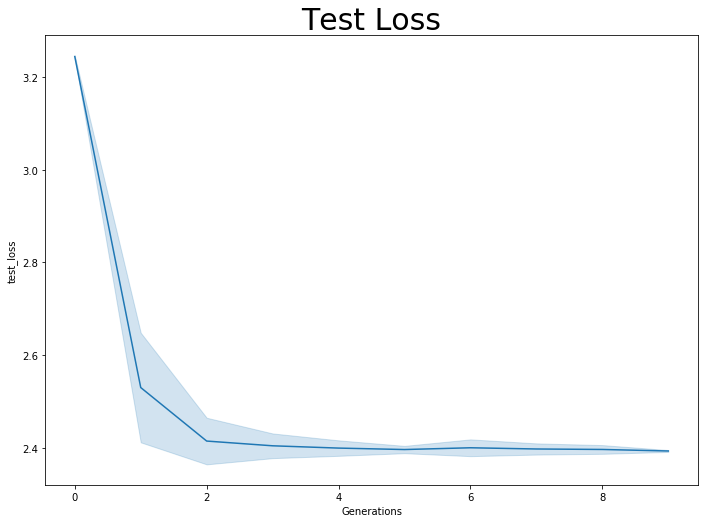

In [4]:
plot_metric(metrics)

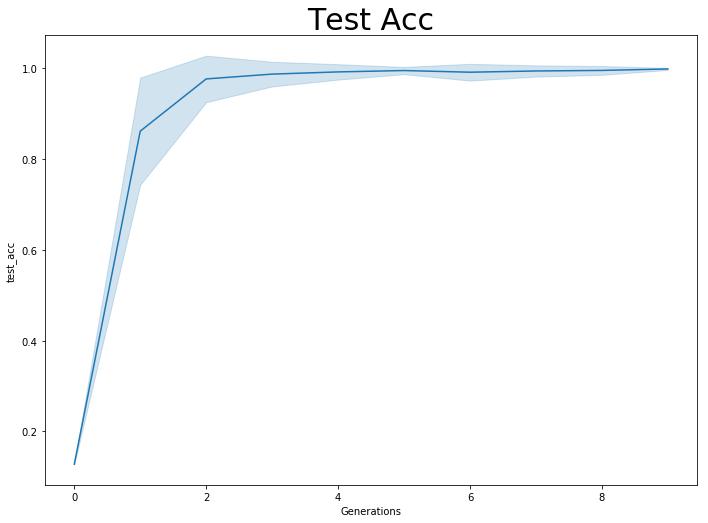

In [5]:
plot_metric(metrics, metric='test_acc')

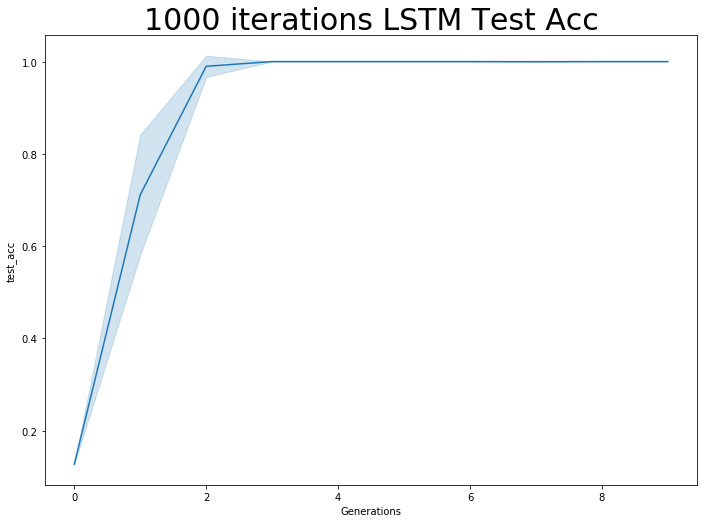

In [18]:
plot_metric(metrics_lstm, metric='test_acc', title="1000 iterations LSTM Test Acc")

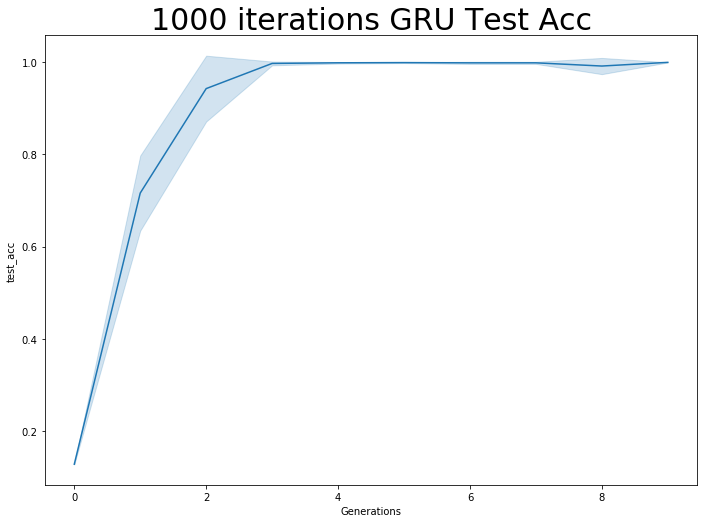

In [19]:
plot_metric(metrics_gru, metric='test_acc', title="1000 iterations GRU Test Acc")

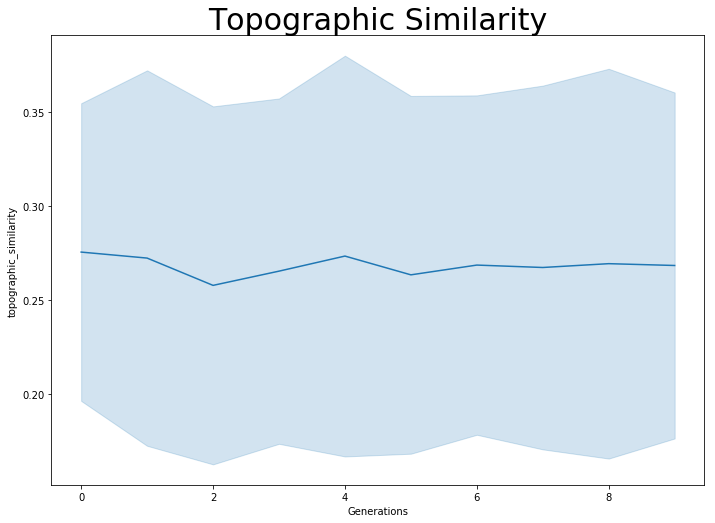

In [6]:
plot_metric(metrics, metric='topographic_similarity')

In [ ]:
plot_metric(metrics, metric='topographic_similarity')

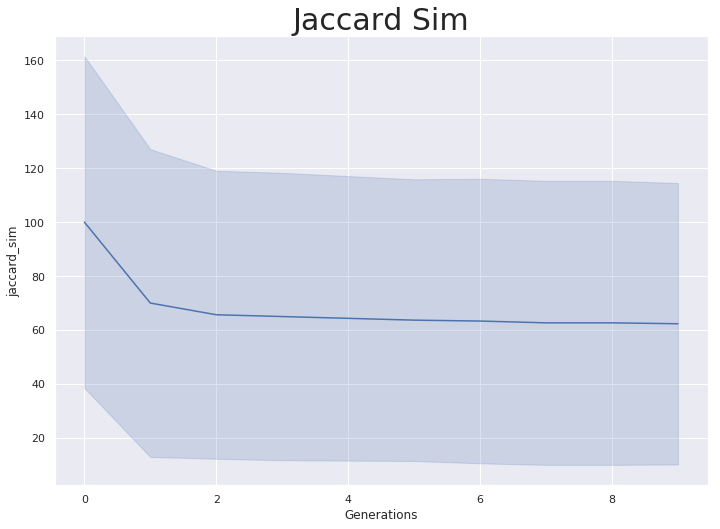

In [33]:
plot_metric(metrics, metric='jaccard_sim')

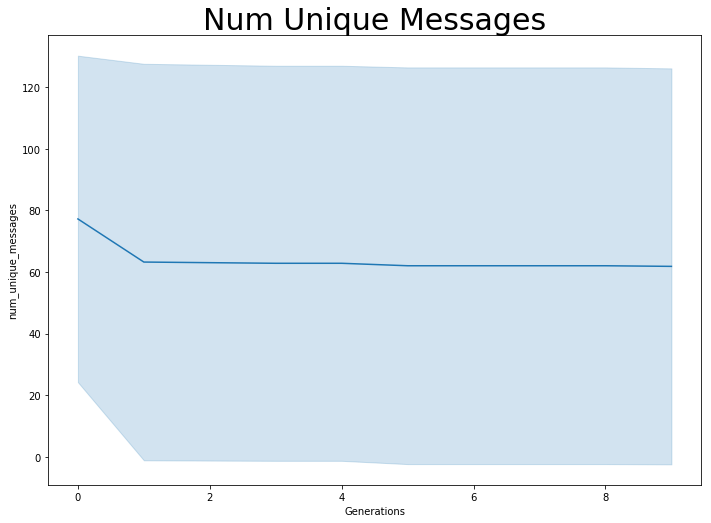

In [9]:
plot_metric(metrics, metric='num_unique_messages')

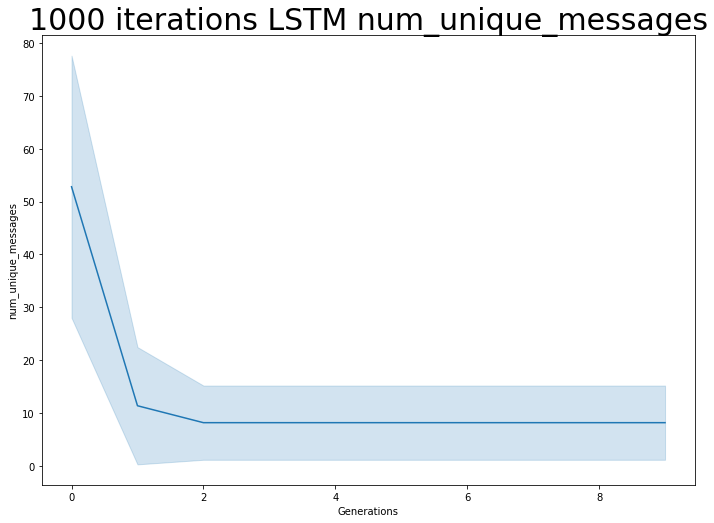

In [21]:
plot_metric(metrics_lstm, metric='num_unique_messages', title="1000 iterations LSTM num_unique_messages")

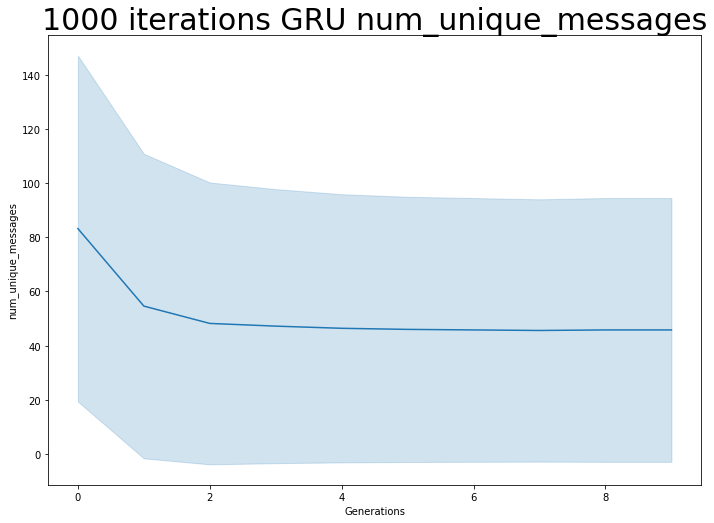

In [22]:
plot_metric(metrics_gru, metric='num_unique_messages', title="1000 iterations GRU num_unique_messages")